# 새로운 수요지 및 후보지

# 1. 데이터 불러오기

## 1.1 후보지 불러오기

In [370]:
# import libaray and packages
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


df1 = pd.read_csv('./강서구 이재민 대피소.csv', encoding='utf-8')
df1

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,상세주소,시설면적,주거능력,경도,위도,관리부서,지자체담당자연락처,수용인원,최대수용인원,geometry
0,1150000000,357,서울특별시,강서구,3,경로당,봉바위 경로당,1150010300110610036019166,1.150010e+09,1150061500,서울특별시 강서구 강서로34길 34(화곡동),90,34,126.841577,37.543132,최송자,NaN,62,108,POINT (126.84157703 37.54313157)
1,1150000000,340,서울특별시,강서구,1,학교,염경초등학교,1150010100100790000028128,1.150010e+09,1150051000,서울특별시 강서구 양천로69길 49(염창동),843,324,126.871235,37.554774,조유나,NaN,589,1011,POINT (126.87123471 37.55477385)
2,1150000000,422,서울특별시,강서구,1,학교,염경중학교,1150010100100790000028255,1.150010e+09,1150051000,서울특별시 강서구 양천로69길 35(염창동),690,265,126.870684,37.554496,송채정,NaN,482,828,POINT (126.870684 37.554496)
3,1150000000,341,서울특별시,강서구,3,경로당,염창강변 경로당,1150010100101140002028129,1.150010e+09,1150051000,서울특별시 강서구 양천로77길 58-25 (염창동),116,44,126.875859,37.551564,최순홍,NaN,81,139,POINT (126.87585879 37.55156368)
4,1150000000,432,서울특별시,강서구,13,"연수,숙박",JK블라썸 호텔,1150010100100200085027473,1.150010e+09,1150051000,서울특별시 강서구 양천로65길 41-22 (염창동),8284,672,126.867609,37.556842,이재관,NaN,5793,9940,POINT (126.86760914 37.55684224)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1150000000,434,서울특별시,강서구,3,경로당,동부경로당(방화1동),1150010900101680087004753,1.150011e+09,1150063000,서울특별시 강서구 양천로28길 12-9 (방화동),98,37,126.819849,37.572534,황영길,NaN,68,117,POINT (126.81984909 37.57253425)
83,1150000000,392,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화11종합사회복지관,1150010900108510000001415,1.150011e+09,1150064000,"서울특별시 강서구 개화동로21길 4(방화동, 방화11단지아파트)",123,47,126.805531,37.570145,신택원,NaN,86,147,POINT (126.805531 37.5701452)
84,1150000000,393,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화6종합사회복지관,1150010900108160000000206,1.150011e+09,1150064100,"서울특별시 강서구 금낭화로23길 25(방화동, 방화6단지아파트)",81,31,126.810839,37.578400,심혜수,NaN,56,97,POINT (126.81083884 37.57840035)
85,1150000000,394,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화2종합사회복지관 (우정),1150010900108390000000213,1.150011e+09,1150064100,"서울특별시 강서구 방화대로48길 40(방화동, 방화2단지아파트)",88,33,126.818740,37.574777,김민교,NaN,61,105,POINT (126.81873984 37.57477652)


In [371]:
fa = df1[['경도', '위도']].values.tolist()
fa

[[126.84157703, 37.54313157],
 [126.87123471, 37.55477385],
 [126.870684, 37.554496],
 [126.87585879, 37.55156368],
 [126.86760914, 37.55684224],
 [126.85836869, 37.54764248],
 [126.86203514, 37.55325237],
 [126.84776203, 37.56129465],
 [126.85930295, 37.54818989],
 [126.85940295, 37.55246271],
 [126.861622, 37.541924],
 [126.86241609, 37.55376178],
 [126.85461935, 37.55916263],
 [126.86004918, 37.54648189],
 [126.84251342, 37.56498748],
 [126.85177295, 37.56085679],
 [126.84966426, 37.56159306],
 [126.84333724, 37.56146382],
 [126.84628453, 37.54907936],
 [126.85497096, 37.55176644],
 [126.83911441, 37.53999697],
 [126.842567, 37.536716],
 [126.84595021, 37.54320861],
 [126.85254765, 37.53272488],
 [126.85583683, 37.53869194],
 [126.83630531, 37.53443295],
 [126.84753388, 37.54059292],
 [126.83094673, 37.54993686],
 [126.83317158, 37.55218692],
 [126.84214144, 37.5572695],
 [126.82306377, 37.54678034],
 [126.810892, 37.562181],
 [126.815248, 37.553596],
 [126.81467372, 37.56376403],
 

## 1.2 수요지 불러오기

In [372]:
Demand = pd.read_excel('./seoul_data_with_clusters_val.xlsx')
Demand

,gid,lbl,val,geometry,centroid,Cluster
0,다사44b50b,7274.0,7274,POLYGON ((126.87166727748006 37.55217263943571...,POINT (126.87447861716478 37.554440916574116),6
1,다사43a51a,8520.0,8520,POLYGON ((126.85464742446162 37.55658755675722...,POINT (126.85745840626947 37.55885623426102),2
2,다사41a51a,1328.0,1328,POLYGON ((126.83200486043259 37.55646162075101...,POINT (126.83481514293639 37.55873083084082),5
3,다사43a50a,2700.0,2700,POLYGON ((126.85472513836034 37.54757454292974...,POINT (126.85753578801214 37.54984321892637),2
4,다사39b51b,8887.0,8887,"POLYGON ((126.81498177513906 37.5608707850333,...",POINT (126.8177916986377 37.56314039523069),8
...,...,...,...,...,...,...
108,다사40b52a,2305.0,2305,POLYGON ((126.82626308391451 37.56544240709029...,POINT (126.82907352341378 37.56771175199463),8
109,다사39a52b,7878.0,7878,POLYGON ((126.80923762108505 37.56985071324467...,POINT (126.81204770126898 37.572120458340635),1
110,다사38b53a,1267.0,1267,POLYGON ((126.80353405019208 37.57432389367343...,POINT (126.80634412108596 37.5765937727832),1
111,다사39b53b,1588.0,1588,POLYGON ((126.81481665885303 37.57889661247702...,POINT (126.8176272461621 37.58116622629844),1


In [373]:
Demand['centroid']

0      POINT (126.87447861716478 37.554440916574116)
1       POINT (126.85745840626947 37.55885623426102)
2       POINT (126.83481514293639 37.55873083084082)
3       POINT (126.85753578801214 37.54984321892637)
4        POINT (126.8177916986377 37.56314039523069)
                           ...                      
108     POINT (126.82907352341378 37.56771175199463)
109    POINT (126.81204770126898 37.572120458340635)
110      POINT (126.80634412108596 37.5765937727832)
111      POINT (126.8176272461621 37.58116622629844)
112     POINT (126.83497532366995 37.54070486735756)
Name: centroid, Length: 113, dtype: object

In [374]:
from shapely import wkt

# 데이터프레임에 경도(Longitude)와 위도(Latitude) 열 추가
Demand['centroid'] = Demand['centroid'].apply(lambda point_str: wkt.loads(point_str))
Demand['경도'] = Demand['centroid'].apply(lambda point: point.x)
Demand['위도'] = Demand['centroid'].apply(lambda point: point.y)


In [375]:
Demand

,gid,lbl,val,geometry,centroid,Cluster,경도,위도
0,다사44b50b,7274.0,7274,POLYGON ((126.87166727748006 37.55217263943571...,POINT (126.87447861716478 37.554440916574116),6,126.874479,37.554441
1,다사43a51a,8520.0,8520,POLYGON ((126.85464742446162 37.55658755675722...,POINT (126.85745840626947 37.55885623426102),2,126.857458,37.558856
2,다사41a51a,1328.0,1328,POLYGON ((126.83200486043259 37.55646162075101...,POINT (126.83481514293639 37.55873083084082),5,126.834815,37.558731
3,다사43a50a,2700.0,2700,POLYGON ((126.85472513836034 37.54757454292974...,POINT (126.85753578801214 37.54984321892637),2,126.857536,37.549843
4,다사39b51b,8887.0,8887,"POLYGON ((126.81498177513906 37.5608707850333,...",POINT (126.8177916986377 37.56314039523069),8,126.817792,37.563140
...,...,...,...,...,...,...,...,...
108,다사40b52a,2305.0,2305,POLYGON ((126.82626308391451 37.56544240709029...,POINT (126.82907352341378 37.56771175199463),8,126.829074,37.567712
109,다사39a52b,7878.0,7878,POLYGON ((126.80923762108505 37.56985071324467...,POINT (126.81204770126898 37.572120458340635),1,126.812048,37.572120
110,다사38b53a,1267.0,1267,POLYGON ((126.80353405019208 37.57432389367343...,POINT (126.80634412108596 37.5765937727832),1,126.806344,37.576594
111,다사39b53b,1588.0,1588,POLYGON ((126.81481665885303 37.57889661247702...,POINT (126.8176272461621 37.58116622629844),1,126.817627,37.581166


# 2. 기존 수요 커버율

## 2.1 거리 제약을 사용하여 할당된 후보지 도출

In [376]:
# from sklearn.neighbors import KNeighborsClassifier

# 수요지 좌표, 수요량, 후보지 좌표, 용량 데이터
demand_points = Demand[['경도', '위도']].values.tolist()  # 수요지 좌표 리스트
demand_demands = Demand['val'].tolist()  # 수요지 수요량 리스트
candidate_points = df1[['경도', '위도', '수용인원']].values.tolist()  # 후보지 좌표와 용량 리스트

#수요지와 후보지 간의 맨하탄 거리 계산 (500m 제약)
def calculate_manhattan_distance(point1, point2):
    lat_diff = abs(point2[1] - point1[1]) / (111000 / 500)
    lon_diff = abs(point2[0] - point1[0]) / (111000 / 500)
    distance = lat_diff + lon_diff
    return distance

# 거리 제약을 적용하여 후보지 할당
assigned_candidates = []
for demand, demand_demand in zip(demand_points, demand_demands):
    min_distance = float('inf')  # 최소 거리 초기화
    selected_candidate = None
    for i, candidate in enumerate(candidate_points):
        distance = calculate_manhattan_distance(demand, candidate[:2])
        if distance <= 1:  # 거리 제약 (500m 이내)
            if candidate[2] >= demand_demand:  # 용량 제약
                if distance < min_distance or (distance == min_distance and candidate[2] > candidate_points[selected_candidate][2]):
                    min_distance = distance
                    selected_candidate = i
    assigned_candidates.append(selected_candidate)

# 결과 출력
for demand, demand_demand, candidate_idx in zip(demand_points, demand_demands, assigned_candidates):
    if candidate_idx is not None:
        candidate_coords = candidate_points[candidate_idx][:2]
        distance = calculate_manhattan_distance(demand, candidate_coords)
        print(f"수요지 좌표: {demand}, 수요량: {demand_demand}, 할당된 후보지 인덱스: {candidate_idx}, 좌표: {candidate_coords}, 거리: {distance}m")
    else:
        print(f"수요지 좌표: {demand}, 수요량: {demand_demand}, 할당된 후보지 없음")


수요지 좌표: [126.87447861716478, 37.554440916574116], 수요량: 7274, 할당된 후보지 없음
수요지 좌표: [126.85745840626947, 37.55885623426102], 수요량: 8520, 할당된 후보지 없음
수요지 좌표: [126.83481514293639, 37.55873083084082], 수요량: 1328, 할당된 후보지 인덱스: 71, 좌표: [126.8378679, 37.55126776], 거리: 4.7368594164119894e-05m
수요지 좌표: [126.85753578801214, 37.54984321892637], 수요량: 2700, 할당된 후보지 인덱스: 4, 좌표: [126.86760914, 37.55684224], 거리: 7.690258135805461e-05m
수요지 좌표: [126.8177916986377, 37.56314039523069], 수요량: 8887, 할당된 후보지 없음
수요지 좌표: [126.78965737655655, 37.54494765829976], 수요량: 0, 할당된 후보지 인덱스: 32, 좌표: [126.815248, 37.553596], 거리: 0.00015422957271930663m
수요지 좌표: [126.82353430474967, 37.55416002558609], 수요량: 3258, 할당된 후보지 인덱스: 25, 좌표: [126.83630531, 37.53443295], 거리: 0.00014638775151540003m
수요지 좌표: [126.83465481942682, 37.5767567385659], 수요량: 404, 할당된 후보지 인덱스: 62, 좌표: [126.83946041, 37.57002395], 거리: 5.1974680806678476e-05m
수요지 좌표: [126.81787386994642, 37.554127458774815], 수요량: 2624, 할당된 후보지 인덱스: 27, 좌표: [126.83094673, 37.54993686]

In [377]:
import pandas as pd

result_df = pd.DataFrame(columns=['수요지 좌표', '수요량', '할당된 후보지 인덱스', '후보지 좌표', '거리'])

for demand, demand_demand, candidate_idx in zip(demand_points, demand_demands, assigned_candidates):
    if candidate_idx is not None:
        candidate_coord = candidate_points[candidate_idx][:2]
        distance = calculate_manhattan_distance(demand, candidate_coord)
        result_df = result_df.append({'수요지 좌표': demand, '수요량': demand_demand, '할당된 후보지 인덱스': candidate_idx, '후보지 좌표': candidate_coord, '거리': distance}, ignore_index=True)
    else:
        result_df = result_df.append({'수요지 좌표': demand, '수요량': demand_demand, '할당된 후보지 인덱스': None, '후보지 좌표': None, '거리': None}, ignore_index=True)

result_df



,수요지 좌표,수요량,할당된 후보지 인덱스,후보지 좌표,거리
0,"[126.87447861716478, 37.554440916574116]",7274,None,None,NaN
1,"[126.85745840626947, 37.55885623426102]",8520,None,None,NaN
2,"[126.83481514293639, 37.55873083084082]",1328,71,"[126.8378679, 37.55126776]",0.000047
3,"[126.85753578801214, 37.54984321892637]",2700,4,"[126.86760914, 37.55684224]",0.000077
4,"[126.8177916986377, 37.56314039523069]",8887,None,None,None
...,...,...,...,...,...
108,"[126.82907352341378, 37.56771175199463]",2305,27,"[126.83094673, 37.54993686]",0.000089
109,"[126.81204770126898, 37.572120458340635]",7878,None,None,None
110,"[126.80634412108596, 37.5765937727832]",1267,39,"[126.81457158, 37.57561656]",0.000041
111,"[126.8176272461621, 37.58116622629844]",1588,39,"[126.81457158, 37.57561656]",0.000039


In [378]:
import pandas as pd
from shapely import wkt

result_df = pd.DataFrame(columns=['수요지 좌표', '수요량', '할당된 후보지 인덱스', '후보지 좌표', '거리'])

for demand, demand_demand, candidate_idx in zip(demand_points, demand_demands, assigned_candidates):
    if candidate_idx is not None:
        candidate_coord = candidate_points[candidate_idx][:2]
        distance = calculate_manhattan_distance(demand, candidate_coord)
        result_df = result_df.append({'수요지 좌표': demand, '수요량': demand_demand, '할당된 후보지 인덱스': candidate_idx, '후보지 좌표': candidate_coord, '거리': distance}, ignore_index=True)
    else:
        result_df = result_df.append({'수요지 좌표': demand, '수요량': demand_demand, '할당된 후보지 인덱스': None, '후보지 좌표': [None, None], '거리': None}, ignore_index=True)

result_df['후보지 좌표'] = result_df['후보지 좌표'].apply(lambda point_list: wkt.loads(f"POINT({point_list[0]} {point_list[1]})") if point_list[0] is not None else None)
result_df['후보지 경도'] = result_df['후보지 좌표'].apply(lambda point: point.x if point is not None else None)
result_df['후보지 위도'] = result_df['후보지 좌표'].apply(lambda point: point.y if point is not None else None)

result_df



,수요지 좌표,수요량,할당된 후보지 인덱스,후보지 좌표,거리,후보지 경도,후보지 위도
0,"[126.87447861716478, 37.554440916574116]",7274,None,None,NaN,NaN,NaN
1,"[126.85745840626947, 37.55885623426102]",8520,None,None,NaN,NaN,NaN
2,"[126.83481514293639, 37.55873083084082]",1328,71,POINT (126.8378679 37.55126776),0.000047,126.837868,37.551268
3,"[126.85753578801214, 37.54984321892637]",2700,4,POINT (126.86760914 37.55684224),0.000077,126.867609,37.556842
4,"[126.8177916986377, 37.56314039523069]",8887,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...
108,"[126.82907352341378, 37.56771175199463]",2305,27,POINT (126.83094673 37.54993686),0.000089,126.830947,37.549937
109,"[126.81204770126898, 37.572120458340635]",7878,None,None,None,NaN,NaN
110,"[126.80634412108596, 37.5765937727832]",1267,39,POINT (126.81457158 37.57561656),0.000041,126.814572,37.575617
111,"[126.8176272461621, 37.58116622629844]",1588,39,POINT (126.81457158 37.57561656),0.000039,126.814572,37.575617


In [379]:
result_df['수요지 좌표'] = result_df['수요지 좌표'].apply(lambda point_list: wkt.loads(f"POINT({point_list[0]} {point_list[1]})"))
result_df['수요지 경도'] = result_df['수요지 좌표'].apply(lambda point: point.x)
result_df['수요지 위도'] = result_df['수요지 좌표'].apply(lambda point: point.y)


In [380]:
result_df

,수요지 좌표,수요량,할당된 후보지 인덱스,후보지 좌표,거리,후보지 경도,후보지 위도,수요지 경도,수요지 위도
0,POINT (126.87447861716478 37.554440916574116),7274,None,None,NaN,NaN,NaN,126.874479,37.554441
1,POINT (126.85745840626947 37.55885623426102),8520,None,None,NaN,NaN,NaN,126.857458,37.558856
2,POINT (126.83481514293639 37.55873083084082),1328,71,POINT (126.8378679 37.55126776),0.000047,126.837868,37.551268,126.834815,37.558731
3,POINT (126.85753578801214 37.54984321892637),2700,4,POINT (126.86760914 37.55684224),0.000077,126.867609,37.556842,126.857536,37.549843
4,POINT (126.8177916986377 37.56314039523069),8887,None,None,None,NaN,NaN,126.817792,37.563140
...,...,...,...,...,...,...,...,...,...
108,POINT (126.82907352341378 37.56771175199463),2305,27,POINT (126.83094673 37.54993686),0.000089,126.830947,37.549937,126.829074,37.567712
109,POINT (126.81204770126898 37.572120458340635),7878,None,None,None,NaN,NaN,126.812048,37.572120
110,POINT (126.80634412108596 37.5765937727832),1267,39,POINT (126.81457158 37.57561656),0.000041,126.814572,37.575617,126.806344,37.576594
111,POINT (126.8176272461621 37.58116622629844),1588,39,POINT (126.81457158 37.57561656),0.000039,126.814572,37.575617,126.817627,37.581166


In [ ]:
result_df.excel_to



## 2.2 할당된 기존 후보지 시각화

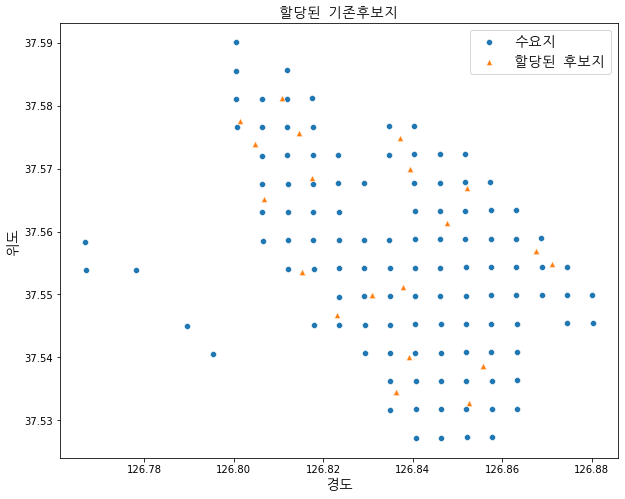

In [331]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Circle
import seaborn as sns

# 한글 폰트 경로 설정
font_path = './data2/NanumGothic.ttf'  # 자신이 사용할 폰트 파일 경로로 수정해주세요.

# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=14) 

# Plot clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=result_df, x='수요지 경도', y='수요지 위도' , palette='tab10',label='수요지')
sns.scatterplot(data=result_df, x='후보지 경도', y='후보지 위도', marker='^',label='할당된 후보지')
plt.title('할당된 기존후보지', fontproperties=fontprop)
plt.xlabel('경도', fontproperties=fontprop)
plt.ylabel('위도', fontproperties=fontprop)
plt.legend(prop=fontprop)

plt.show()

In [332]:
result_df['val']=Demand['val']

In [333]:
result_df

,수요지 좌표,수요량,할당된 후보지 인덱스,후보지 좌표,거리,후보지 경도,후보지 위도,수요지 경도,수요지 위도,val
0,POINT (126.87447861716478 37.554440916574116),7274,None,None,NaN,NaN,NaN,126.874479,37.554441,7274
1,POINT (126.85745840626947 37.55885623426102),8520,None,None,NaN,NaN,NaN,126.857458,37.558856,8520
2,POINT (126.83481514293639 37.55873083084082),1328,71,POINT (126.8378679 37.55126776),0.000047,126.837868,37.551268,126.834815,37.558731,1328
3,POINT (126.85753578801214 37.54984321892637),2700,4,POINT (126.86760914 37.55684224),0.000077,126.867609,37.556842,126.857536,37.549843,2700
4,POINT (126.8177916986377 37.56314039523069),8887,None,None,None,NaN,NaN,126.817792,37.563140,8887
...,...,...,...,...,...,...,...,...,...,...
108,POINT (126.82907352341378 37.56771175199463),2305,27,POINT (126.83094673 37.54993686),0.000089,126.830947,37.549937,126.829074,37.567712,2305
109,POINT (126.81204770126898 37.572120458340635),7878,None,None,None,NaN,NaN,126.812048,37.572120,7878
110,POINT (126.80634412108596 37.5765937727832),1267,39,POINT (126.81457158 37.57561656),0.000041,126.814572,37.575617,126.806344,37.576594,1267
111,POINT (126.8176272461621 37.58116622629844),1588,39,POINT (126.81457158 37.57561656),0.000039,126.814572,37.575617,126.817627,37.581166,1588


In [334]:
df1

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,...,주거능력,경도,위도,관리부서,지자체담당자연락처,수용인원,최대수용인원,geometry,남은 수용인원,남은 최대수용인원
0,1150000000,357,서울특별시,강서구,3,경로당,봉바위 경로당,1150010300110610036019166,1.150010e+09,1150061500,...,34,126.841577,37.543132,최송자,NaN,62,108,POINT (126.84157703 37.54313157),NaN,NaN
1,1150000000,340,서울특별시,강서구,1,학교,염경초등학교,1150010100100790000028128,1.150010e+09,1150051000,...,324,126.871235,37.554774,조유나,NaN,589,1011,POINT (126.87123471 37.55477385),493.0,915.0
2,1150000000,422,서울특별시,강서구,1,학교,염경중학교,1150010100100790000028255,1.150010e+09,1150051000,...,265,126.870684,37.554496,송채정,NaN,482,828,POINT (126.870684 37.554496),NaN,NaN
3,1150000000,341,서울특별시,강서구,3,경로당,염창강변 경로당,1150010100101140002028129,1.150010e+09,1150051000,...,44,126.875859,37.551564,최순홍,NaN,81,139,POINT (126.87585879 37.55156368),NaN,NaN
4,1150000000,432,서울특별시,강서구,13,"연수,숙박",JK블라썸 호텔,1150010100100200085027473,1.150010e+09,1150051000,...,672,126.867609,37.556842,이재관,NaN,5793,9940,POINT (126.86760914 37.55684224),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1150000000,434,서울특별시,강서구,3,경로당,동부경로당(방화1동),1150010900101680087004753,1.150011e+09,1150063000,...,37,126.819849,37.572534,황영길,NaN,68,117,POINT (126.81984909 37.57253425),NaN,NaN
83,1150000000,392,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화11종합사회복지관,1150010900108510000001415,1.150011e+09,1150064000,...,47,126.805531,37.570145,신택원,NaN,86,147,POINT (126.805531 37.5701452),NaN,NaN
84,1150000000,393,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화6종합사회복지관,1150010900108160000000206,1.150011e+09,1150064100,...,31,126.810839,37.578400,심혜수,NaN,56,97,POINT (126.81083884 37.57840035),NaN,NaN
85,1150000000,394,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화2종합사회복지관 (우정),1150010900108390000000213,1.150011e+09,1150064100,...,33,126.818740,37.574777,김민교,NaN,61,105,POINT (126.81873984 37.57477652),NaN,NaN


In [335]:
if '할당된 후보지 인덱스' in result_df.columns:
    result_df1 = result_df.merge(df1[['수용인원', '최대수용인원']], left_on='할당된 후보지 인덱스', right_index=True, how='left')


In [336]:
result_df1

,수요지 좌표,수요량,할당된 후보지 인덱스,후보지 좌표,거리,후보지 경도,후보지 위도,수요지 경도,수요지 위도,val,수용인원,최대수용인원
0,POINT (126.87447861716478 37.554440916574116),7274,None,None,NaN,NaN,NaN,126.874479,37.554441,7274,NaN,NaN
1,POINT (126.85745840626947 37.55885623426102),8520,None,None,NaN,NaN,NaN,126.857458,37.558856,8520,NaN,NaN
2,POINT (126.83481514293639 37.55873083084082),1328,71,POINT (126.8378679 37.55126776),0.000047,126.837868,37.551268,126.834815,37.558731,1328,1730.0,2970.0
3,POINT (126.85753578801214 37.54984321892637),2700,4,POINT (126.86760914 37.55684224),0.000077,126.867609,37.556842,126.857536,37.549843,2700,5793.0,9940.0
4,POINT (126.8177916986377 37.56314039523069),8887,None,None,None,NaN,NaN,126.817792,37.563140,8887,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
108,POINT (126.82907352341378 37.56771175199463),2305,27,POINT (126.83094673 37.54993686),0.000089,126.830947,37.549937,126.829074,37.567712,2305,3001.0,5150.0
109,POINT (126.81204770126898 37.572120458340635),7878,None,None,None,NaN,NaN,126.812048,37.572120,7878,NaN,NaN
110,POINT (126.80634412108596 37.5765937727832),1267,39,POINT (126.81457158 37.57561656),0.000041,126.814572,37.575617,126.806344,37.576594,1267,1615.0,2772.0
111,POINT (126.8176272461621 37.58116622629844),1588,39,POINT (126.81457158 37.57561656),0.000039,126.814572,37.575617,126.817627,37.581166,1588,1615.0,2772.0


In [337]:
result_df1

,수요지 좌표,수요량,할당된 후보지 인덱스,후보지 좌표,거리,후보지 경도,후보지 위도,수요지 경도,수요지 위도,val,수용인원,최대수용인원
0,POINT (126.87447861716478 37.554440916574116),7274,None,None,NaN,NaN,NaN,126.874479,37.554441,7274,NaN,NaN
1,POINT (126.85745840626947 37.55885623426102),8520,None,None,NaN,NaN,NaN,126.857458,37.558856,8520,NaN,NaN
2,POINT (126.83481514293639 37.55873083084082),1328,71,POINT (126.8378679 37.55126776),0.000047,126.837868,37.551268,126.834815,37.558731,1328,1730.0,2970.0
3,POINT (126.85753578801214 37.54984321892637),2700,4,POINT (126.86760914 37.55684224),0.000077,126.867609,37.556842,126.857536,37.549843,2700,5793.0,9940.0
4,POINT (126.8177916986377 37.56314039523069),8887,None,None,None,NaN,NaN,126.817792,37.563140,8887,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
108,POINT (126.82907352341378 37.56771175199463),2305,27,POINT (126.83094673 37.54993686),0.000089,126.830947,37.549937,126.829074,37.567712,2305,3001.0,5150.0
109,POINT (126.81204770126898 37.572120458340635),7878,None,None,None,NaN,NaN,126.812048,37.572120,7878,NaN,NaN
110,POINT (126.80634412108596 37.5765937727832),1267,39,POINT (126.81457158 37.57561656),0.000041,126.814572,37.575617,126.806344,37.576594,1267,1615.0,2772.0
111,POINT (126.8176272461621 37.58116622629844),1588,39,POINT (126.81457158 37.57561656),0.000039,126.814572,37.575617,126.817627,37.581166,1588,1615.0,2772.0


In [338]:
grouped_df = result_df.groupby('할당된 후보지 인덱스')['수요량'].sum().reset_index()
grouped_df

,할당된 후보지 인덱스,수요량
0,1,96
1,4,100714
2,7,1215
3,20,930
4,23,225
5,24,3413
6,25,28512
7,27,12536
8,30,0
9,32,0


In [341]:
grouped_df['수용인원'] = df1.loc[grouped_df['할당된 후보지 인덱스'], '수용인원'].values
grouped_df['최대수용인원'] = df1.loc[grouped_df['할당된 후보지 인덱스'], '최대수용인원'].values
grouped_df

,할당된 후보지 인덱스,수요량,수용인원,최대수용인원
0,1,96,589,1011
1,4,100714,5793,9940
2,7,1215,1384,2376
3,20,930,2307,3960
4,23,225,521,895
5,24,3413,2167,3720
6,25,28512,4033,6921
7,27,12536,3001,5150
8,30,0,181,312
9,32,0,607,1042


In [345]:
if '수요량' in grouped_df.columns and '최대수용인원' in grouped_df.columns:
    grouped_df['실질 최대수요량'] = grouped_df['수요량'] - grouped_df['최대수용인원']


In [346]:
if '수요량' in grouped_df.columns and '수용인원' in grouped_df.columns:
    grouped_df['실질 수요량'] = grouped_df['수요량'] - grouped_df['수용인원']


In [347]:
grouped_df

,할당된 후보지 인덱스,수요량,수용인원,최대수용인원,실질 최대수요량,실질 수요량
0,1,96,589,1011,-915,-493
1,4,100714,5793,9940,90774,94921
2,7,1215,1384,2376,-1161,-169
3,20,930,2307,3960,-3030,-1377
4,23,225,521,895,-670,-296
5,24,3413,2167,3720,-307,1246
6,25,28512,4033,6921,21591,24479
7,27,12536,3001,5150,7386,9535
8,30,0,181,312,-312,-181
9,32,0,607,1042,-1042,-607


In [348]:
df1

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,...,주거능력,경도,위도,관리부서,지자체담당자연락처,수용인원,최대수용인원,geometry,남은 수용인원,남은 최대수용인원
0,1150000000,357,서울특별시,강서구,3,경로당,봉바위 경로당,1150010300110610036019166,1.150010e+09,1150061500,...,34,126.841577,37.543132,최송자,NaN,62,108,POINT (126.84157703 37.54313157),NaN,NaN
1,1150000000,340,서울특별시,강서구,1,학교,염경초등학교,1150010100100790000028128,1.150010e+09,1150051000,...,324,126.871235,37.554774,조유나,NaN,589,1011,POINT (126.87123471 37.55477385),493.0,915.0
2,1150000000,422,서울특별시,강서구,1,학교,염경중학교,1150010100100790000028255,1.150010e+09,1150051000,...,265,126.870684,37.554496,송채정,NaN,482,828,POINT (126.870684 37.554496),NaN,NaN
3,1150000000,341,서울특별시,강서구,3,경로당,염창강변 경로당,1150010100101140002028129,1.150010e+09,1150051000,...,44,126.875859,37.551564,최순홍,NaN,81,139,POINT (126.87585879 37.55156368),NaN,NaN
4,1150000000,432,서울특별시,강서구,13,"연수,숙박",JK블라썸 호텔,1150010100100200085027473,1.150010e+09,1150051000,...,672,126.867609,37.556842,이재관,NaN,5793,9940,POINT (126.86760914 37.55684224),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1150000000,434,서울특별시,강서구,3,경로당,동부경로당(방화1동),1150010900101680087004753,1.150011e+09,1150063000,...,37,126.819849,37.572534,황영길,NaN,68,117,POINT (126.81984909 37.57253425),NaN,NaN
83,1150000000,392,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화11종합사회복지관,1150010900108510000001415,1.150011e+09,1150064000,...,47,126.805531,37.570145,신택원,NaN,86,147,POINT (126.805531 37.5701452),NaN,NaN
84,1150000000,393,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화6종합사회복지관,1150010900108160000000206,1.150011e+09,1150064100,...,31,126.810839,37.578400,심혜수,NaN,56,97,POINT (126.81083884 37.57840035),NaN,NaN
85,1150000000,394,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화2종합사회복지관 (우정),1150010900108390000000213,1.150011e+09,1150064100,...,33,126.818740,37.574777,김민교,NaN,61,105,POINT (126.81873984 37.57477652),NaN,NaN


In [349]:
grouped_df

,할당된 후보지 인덱스,수요량,수용인원,최대수용인원,실질 최대수요량,실질 수요량
0,1,96,589,1011,-915,-493
1,4,100714,5793,9940,90774,94921
2,7,1215,1384,2376,-1161,-169
3,20,930,2307,3960,-3030,-1377
4,23,225,521,895,-670,-296
5,24,3413,2167,3720,-307,1246
6,25,28512,4033,6921,21591,24479
7,27,12536,3001,5150,7386,9535
8,30,0,181,312,-312,-181
9,32,0,607,1042,-1042,-607


- 할당된 후보지들은 수요량-(최대)수용인원을 한 결과 모두 음수
- 할당된 수요지들은 모두 없애되 할당된 수요량만큼 용량에서 차감

In [350]:
grouped_df

,할당된 후보지 인덱스,수요량,수용인원,최대수용인원,실질 최대수요량,실질 수요량
0,1,96,589,1011,-915,-493
1,4,100714,5793,9940,90774,94921
2,7,1215,1384,2376,-1161,-169
3,20,930,2307,3960,-3030,-1377
4,23,225,521,895,-670,-296
5,24,3413,2167,3720,-307,1246
6,25,28512,4033,6921,21591,24479
7,27,12536,3001,5150,7386,9535
8,30,0,181,312,-312,-181
9,32,0,607,1042,-1042,-607


In [351]:
grouped_df1 = grouped_df[grouped_df['실질 수요량'] < 0]
grouped_df1

,할당된 후보지 인덱스,수요량,수용인원,최대수용인원,실질 최대수요량,실질 수요량
0,1,96,589,1011,-915,-493
2,7,1215,1384,2376,-1161,-169
3,20,930,2307,3960,-3030,-1377
4,23,225,521,895,-670,-296
8,30,0,181,312,-312,-181
9,32,0,607,1042,-1042,-607
11,38,0,441,758,-758,-441
14,64,148,486,835,-687,-338
15,69,7,199,342,-335,-192
16,71,1328,1730,2970,-1642,-402


In [352]:
grouped_df2 = grouped_df[grouped_df['실질 최대수요량'] < 0]
grouped_df2

,할당된 후보지 인덱스,수요량,수용인원,최대수용인원,실질 최대수요량,실질 수요량
0,1,96,589,1011,-915,-493
2,7,1215,1384,2376,-1161,-169
3,20,930,2307,3960,-3030,-1377
4,23,225,521,895,-670,-296
5,24,3413,2167,3720,-307,1246
8,30,0,181,312,-312,-181
9,32,0,607,1042,-1042,-607
10,37,1461,926,1590,-129,535
11,38,0,441,758,-758,-441
13,62,1620,1525,2618,-998,95


In [353]:
assigned_indices = grouped_df1['할당된 후보지 인덱스'].tolist()
assigned_indices

[1, 7, 20, 23, 30, 32, 38, 64, 69, 71, 74, 75, 86]

In [354]:
assigned_indices2 = grouped_df2['할당된 후보지 인덱스'].tolist()
assigned_indices2

[1, 7, 20, 23, 24, 30, 32, 37, 38, 62, 64, 69, 71, 74, 75, 86]

- 실질(최대)수용인원이 음수라면 완벽하게 커버 가능한 수료지 -> 해당 수요지 제거 후 남은 용량 반영
- 실질(최대)수용인원이 양수라면 어떤곳에 해줘야할지 정확하게 할당 불가 , 수요량과 용량 그대로

# 3. 새로운 후보지 & 수요지

## 3.1 새로운 수요지

### 수용인원 값이 음수라면 , 수요지에서 제거

In [381]:
result_df = result_df[~result_df['할당된 후보지 인덱스'].isin(assigned_indices)]
result_df

,수요지 좌표,수요량,할당된 후보지 인덱스,후보지 좌표,거리,후보지 경도,후보지 위도,수요지 경도,수요지 위도
0,POINT (126.87447861716478 37.554440916574116),7274,None,None,NaN,NaN,NaN,126.874479,37.554441
1,POINT (126.85745840626947 37.55885623426102),8520,None,None,NaN,NaN,NaN,126.857458,37.558856
3,POINT (126.85753578801214 37.54984321892637),2700,4,POINT (126.86760914 37.55684224),0.000077,126.867609,37.556842,126.857536,37.549843
4,POINT (126.8177916986377 37.56314039523069),8887,None,None,None,NaN,NaN,126.817792,37.563140
6,POINT (126.82353430474967 37.55416002558609),3258,25,POINT (126.83630531 37.53443295),0.000146,126.836305,37.534433,126.823534,37.554160
...,...,...,...,...,...,...,...,...,...
108,POINT (126.82907352341378 37.56771175199463),2305,27,POINT (126.83094673 37.54993686),0.000089,126.830947,37.549937,126.829074,37.567712
109,POINT (126.81204770126898 37.572120458340635),7878,None,None,None,NaN,NaN,126.812048,37.572120
110,POINT (126.80634412108596 37.5765937727832),1267,39,POINT (126.81457158 37.57561656),0.000041,126.814572,37.575617,126.806344,37.576594
111,POINT (126.8176272461621 37.58116622629844),1588,39,POINT (126.81457158 37.57561656),0.000039,126.814572,37.575617,126.817627,37.581166


In [382]:
result_df = result_df[~result_df['할당된 후보지 인덱스'].isin(assigned_indices)]
result_df

,수요지 좌표,수요량,할당된 후보지 인덱스,후보지 좌표,거리,후보지 경도,후보지 위도,수요지 경도,수요지 위도
0,POINT (126.87447861716478 37.554440916574116),7274,None,None,NaN,NaN,NaN,126.874479,37.554441
1,POINT (126.85745840626947 37.55885623426102),8520,None,None,NaN,NaN,NaN,126.857458,37.558856
3,POINT (126.85753578801214 37.54984321892637),2700,4,POINT (126.86760914 37.55684224),0.000077,126.867609,37.556842,126.857536,37.549843
4,POINT (126.8177916986377 37.56314039523069),8887,None,None,None,NaN,NaN,126.817792,37.563140
6,POINT (126.82353430474967 37.55416002558609),3258,25,POINT (126.83630531 37.53443295),0.000146,126.836305,37.534433,126.823534,37.554160
...,...,...,...,...,...,...,...,...,...
108,POINT (126.82907352341378 37.56771175199463),2305,27,POINT (126.83094673 37.54993686),0.000089,126.830947,37.549937,126.829074,37.567712
109,POINT (126.81204770126898 37.572120458340635),7878,None,None,None,NaN,NaN,126.812048,37.572120
110,POINT (126.80634412108596 37.5765937727832),1267,39,POINT (126.81457158 37.57561656),0.000041,126.814572,37.575617,126.806344,37.576594
111,POINT (126.8176272461621 37.58116622629844),1588,39,POINT (126.81457158 37.57561656),0.000039,126.814572,37.575617,126.817627,37.581166


In [268]:
result_df.to_excel('실질수요량.xlsx',index=False)

In [385]:
result_df['할당된 후보지 인덱스'].value_counts()

4     25
25     9
27     6
24     3
37     3
62     2
39     2
Name: 할당된 후보지 인덱스, dtype: int64

In [366]:
result_df = result_df.groupby('할당된 후보지 인덱스')['val'].sum().reset_index()
result_df

,할당된 후보지 인덱스,val
0,4,100714
1,24,3413
2,25,28512
3,27,12536
4,37,1461
5,39,2855
6,62,1620


## 3.2 실질 후보지

In [357]:
grouped_df1['남은 수용인원'] = grouped_df1['수용인원'] - grouped_df1['수요량']
grouped_df1

C:\Users\User\AppData\Local\Temp/ipykernel_28856/48318842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df1['남은 수용인원'] = grouped_df1['수용인원'] - grouped_df1['수요량']


,할당된 후보지 인덱스,수요량,수용인원,최대수용인원,실질 최대수요량,실질 수요량,남은 수용인원
0,1,96,589,1011,-915,-493,493
2,7,1215,1384,2376,-1161,-169,169
3,20,930,2307,3960,-3030,-1377,1377
4,23,225,521,895,-670,-296,296
8,30,0,181,312,-312,-181,181
9,32,0,607,1042,-1042,-607,607
11,38,0,441,758,-758,-441,441
14,64,148,486,835,-687,-338,338
15,69,7,199,342,-335,-192,192
16,71,1328,1730,2970,-1642,-402,402


In [358]:
for index, row in grouped_df1.iterrows():
    assigned_index = row['할당된 후보지 인덱스']
    if assigned_index in df1.index:
        remaining_capacity = row['남은 수용인원']
        df1.at[assigned_index, '남은 수용인원'] = remaining_capacity
df1

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,...,주거능력,경도,위도,관리부서,지자체담당자연락처,수용인원,최대수용인원,geometry,남은 수용인원,남은 최대수용인원
0,1150000000,357,서울특별시,강서구,3,경로당,봉바위 경로당,1150010300110610036019166,1.150010e+09,1150061500,...,34,126.841577,37.543132,최송자,NaN,62,108,POINT (126.84157703 37.54313157),NaN,NaN
1,1150000000,340,서울특별시,강서구,1,학교,염경초등학교,1150010100100790000028128,1.150010e+09,1150051000,...,324,126.871235,37.554774,조유나,NaN,589,1011,POINT (126.87123471 37.55477385),493.0,915.0
2,1150000000,422,서울특별시,강서구,1,학교,염경중학교,1150010100100790000028255,1.150010e+09,1150051000,...,265,126.870684,37.554496,송채정,NaN,482,828,POINT (126.870684 37.554496),NaN,NaN
3,1150000000,341,서울특별시,강서구,3,경로당,염창강변 경로당,1150010100101140002028129,1.150010e+09,1150051000,...,44,126.875859,37.551564,최순홍,NaN,81,139,POINT (126.87585879 37.55156368),NaN,NaN
4,1150000000,432,서울특별시,강서구,13,"연수,숙박",JK블라썸 호텔,1150010100100200085027473,1.150010e+09,1150051000,...,672,126.867609,37.556842,이재관,NaN,5793,9940,POINT (126.86760914 37.55684224),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1150000000,434,서울특별시,강서구,3,경로당,동부경로당(방화1동),1150010900101680087004753,1.150011e+09,1150063000,...,37,126.819849,37.572534,황영길,NaN,68,117,POINT (126.81984909 37.57253425),NaN,NaN
83,1150000000,392,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화11종합사회복지관,1150010900108510000001415,1.150011e+09,1150064000,...,47,126.805531,37.570145,신택원,NaN,86,147,POINT (126.805531 37.5701452),NaN,NaN
84,1150000000,393,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화6종합사회복지관,1150010900108160000000206,1.150011e+09,1150064100,...,31,126.810839,37.578400,심혜수,NaN,56,97,POINT (126.81083884 37.57840035),NaN,NaN
85,1150000000,394,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화2종합사회복지관 (우정),1150010900108390000000213,1.150011e+09,1150064100,...,33,126.818740,37.574777,김민교,NaN,61,105,POINT (126.81873984 37.57477652),NaN,NaN


In [359]:
grouped_df2['남은 최대수용인원'] = grouped_df['최대수용인원'] - grouped_df2['수요량']
grouped_df2

C:\Users\User\AppData\Local\Temp/ipykernel_28856/3930004447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df2['남은 최대수용인원'] = grouped_df['최대수용인원'] - grouped_df2['수요량']


,할당된 후보지 인덱스,수요량,수용인원,최대수용인원,실질 최대수요량,실질 수요량,남은 최대수용인원
0,1,96,589,1011,-915,-493,915
2,7,1215,1384,2376,-1161,-169,1161
3,20,930,2307,3960,-3030,-1377,3030
4,23,225,521,895,-670,-296,670
5,24,3413,2167,3720,-307,1246,307
8,30,0,181,312,-312,-181,312
9,32,0,607,1042,-1042,-607,1042
10,37,1461,926,1590,-129,535,129
11,38,0,441,758,-758,-441,758
13,62,1620,1525,2618,-998,95,998


In [361]:
for index, row in grouped_df2.iterrows():
    assigned_index = row['할당된 후보지 인덱스']
    if assigned_index in df1.index:
        remaining_capacity = row['남은 최대수용인원']
        df1.at[assigned_index, '남은 최대수용인원'] = remaining_capacity
df1

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,...,주거능력,경도,위도,관리부서,지자체담당자연락처,수용인원,최대수용인원,geometry,남은 수용인원,남은 최대수용인원
0,1150000000,357,서울특별시,강서구,3,경로당,봉바위 경로당,1150010300110610036019166,1.150010e+09,1150061500,...,34,126.841577,37.543132,최송자,NaN,62,108,POINT (126.84157703 37.54313157),NaN,NaN
1,1150000000,340,서울특별시,강서구,1,학교,염경초등학교,1150010100100790000028128,1.150010e+09,1150051000,...,324,126.871235,37.554774,조유나,NaN,589,1011,POINT (126.87123471 37.55477385),493.0,915.0
2,1150000000,422,서울특별시,강서구,1,학교,염경중학교,1150010100100790000028255,1.150010e+09,1150051000,...,265,126.870684,37.554496,송채정,NaN,482,828,POINT (126.870684 37.554496),NaN,NaN
3,1150000000,341,서울특별시,강서구,3,경로당,염창강변 경로당,1150010100101140002028129,1.150010e+09,1150051000,...,44,126.875859,37.551564,최순홍,NaN,81,139,POINT (126.87585879 37.55156368),NaN,NaN
4,1150000000,432,서울특별시,강서구,13,"연수,숙박",JK블라썸 호텔,1150010100100200085027473,1.150010e+09,1150051000,...,672,126.867609,37.556842,이재관,NaN,5793,9940,POINT (126.86760914 37.55684224),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1150000000,434,서울특별시,강서구,3,경로당,동부경로당(방화1동),1150010900101680087004753,1.150011e+09,1150063000,...,37,126.819849,37.572534,황영길,NaN,68,117,POINT (126.81984909 37.57253425),NaN,NaN
83,1150000000,392,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화11종합사회복지관,1150010900108510000001415,1.150011e+09,1150064000,...,47,126.805531,37.570145,신택원,NaN,86,147,POINT (126.805531 37.5701452),NaN,NaN
84,1150000000,393,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화6종합사회복지관,1150010900108160000000206,1.150011e+09,1150064100,...,31,126.810839,37.578400,심혜수,NaN,56,97,POINT (126.81083884 37.57840035),NaN,NaN
85,1150000000,394,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화2종합사회복지관 (우정),1150010900108390000000213,1.150011e+09,1150064100,...,33,126.818740,37.574777,김민교,NaN,61,105,POINT (126.81873984 37.57477652),NaN,NaN


In [362]:
df1

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,...,주거능력,경도,위도,관리부서,지자체담당자연락처,수용인원,최대수용인원,geometry,남은 수용인원,남은 최대수용인원
0,1150000000,357,서울특별시,강서구,3,경로당,봉바위 경로당,1150010300110610036019166,1.150010e+09,1150061500,...,34,126.841577,37.543132,최송자,NaN,62,108,POINT (126.84157703 37.54313157),NaN,NaN
1,1150000000,340,서울특별시,강서구,1,학교,염경초등학교,1150010100100790000028128,1.150010e+09,1150051000,...,324,126.871235,37.554774,조유나,NaN,589,1011,POINT (126.87123471 37.55477385),493.0,915.0
2,1150000000,422,서울특별시,강서구,1,학교,염경중학교,1150010100100790000028255,1.150010e+09,1150051000,...,265,126.870684,37.554496,송채정,NaN,482,828,POINT (126.870684 37.554496),NaN,NaN
3,1150000000,341,서울특별시,강서구,3,경로당,염창강변 경로당,1150010100101140002028129,1.150010e+09,1150051000,...,44,126.875859,37.551564,최순홍,NaN,81,139,POINT (126.87585879 37.55156368),NaN,NaN
4,1150000000,432,서울특별시,강서구,13,"연수,숙박",JK블라썸 호텔,1150010100100200085027473,1.150010e+09,1150051000,...,672,126.867609,37.556842,이재관,NaN,5793,9940,POINT (126.86760914 37.55684224),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1150000000,434,서울특별시,강서구,3,경로당,동부경로당(방화1동),1150010900101680087004753,1.150011e+09,1150063000,...,37,126.819849,37.572534,황영길,NaN,68,117,POINT (126.81984909 37.57253425),NaN,NaN
83,1150000000,392,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화11종합사회복지관,1150010900108510000001415,1.150011e+09,1150064000,...,47,126.805531,37.570145,신택원,NaN,86,147,POINT (126.805531 37.5701452),NaN,NaN
84,1150000000,393,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화6종합사회복지관,1150010900108160000000206,1.150011e+09,1150064100,...,31,126.810839,37.578400,심혜수,NaN,56,97,POINT (126.81083884 37.57840035),NaN,NaN
85,1150000000,394,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화2종합사회복지관 (우정),1150010900108390000000213,1.150011e+09,1150064100,...,33,126.818740,37.574777,김민교,NaN,61,105,POINT (126.81873984 37.57477652),NaN,NaN


In [363]:
df1.to_excel('실질후보지2.xlsx',index=False)